# DMS - CMIP6 data

In [3]:
import xarray as xr
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline
from dask.diagnostics import ProgressBar

import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))

## Dask local

In [2]:
from dask.distributed import Client
client = Client()   # create a local dask cluster on the local machine.


## Dask with gateway

In [2]:
from dask.distributed import Client
from dask_gateway import Gateway
gateway = Gateway()

In [4]:
#closing open 
# clusters=gateway.list_clusters()
# print(clusters )
# for cluster in clusters :
#     cluster= gateway.connect(cluster.name)
#     print(cluster)
#     client = Client(cluster)
#     client.close()
#     cluster.shutdown()

In [6]:
cluster = gateway.new_cluster(worker_memory=2, worker_cores=1)
cluster.scale(8)
client = Client(cluster) # create a dask Gateway cluster
cluster

In [7]:
if cluster:
    client = Client(cluster) # create a dask Gateway cluster
else:
    client = Client()   # create a local dask cluster on the machine.
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /jupyterhub/services/dask-gateway/clusters/daskhub.14da8a320aef49428581259c223b5bab/status,


In [6]:
# To close at end of session
client.close()

In [7]:
cluster.shutdown()

## List data from CMIP6 of DMS 

In [2]:
# list avilable data in the bucket
s3.ls('escience2022/Ada/monthly')
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dms' in file ]
files

['escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_esm-hist_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_170001-194912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_omip1_r1i1p1f2_gn_195001-200912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_185001-185912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_186001-186912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_187001-187912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_188001-188912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_189001-189912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_190001-190912.nc',
 'escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_esm-hist_r1i1p1f1_gn_191001-191912.nc',
 'escience2022/Ada/mo

## Open data 

In [6]:
%%time
# yi,yf=2000,2020
# remote_files = [
#     's3://escience2022/Ada/monthly/dmsos_Omon_NorESM2-LM_omip1_r1i1p1f1_gn_'+str(y)+'01-'+str(y+9)+'12.nc' 
#     for y in range(yi,yf,10)]
# fileset = [s3.open(file) for file in remote_files]
# ds = xr.open_mfdataset(fileset, combine='by_coords')

fileset = 's3://escience2022/Ada/monthly/fgdms_Omon_CNRM-ESM2-1_historical_r1i1p1f2_gn_185001-201412.nc'
ds = xr.open_dataset(s3.open(fileset) , chunks='auto')
ds=ds.where(ds.lat>60,drop=True)
ds

CPU times: user 1.32 s, sys: 264 ms, total: 1.59 s
Wall time: 11.6 s


<xarray.Dataset>
Dimensions:      (y: 58, x: 306, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    lat          (y, x) float64 dask.array<chunksize=(58, 306), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(58, 306), meta=np.ndarray>
    depth        float64 0.0
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(58, 306, 4), meta=np.ndarray>
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(58, 306, 4), meta=np.ndarray>
    time_bounds  (time, axis_nbounds, y, x) datetime64[ns] dask.array<chunksize=(1980, 2, 58, 306), meta=np.ndarray>
    fgdms        (time, y, x) float32 dask.array<chunksize=(990, 58, 153), meta=np.ndarray>
Attributes: (12/52)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-09-15T06:44:00Z
    description:            CMIP6 historical
    title:                  CNRM-ESM2-1 model output prepared for CMIP6 / CMI...
    activity_id:            CMIP
    contact:                contact.cmip@meteo.fr
    ...                     ...
    xios_commit:            1442-shuffle
    nemo_gelato_commit:     49095b3accd5d4c_6524fe19b00467a
    arpege_minor_version:   6.3.2
    realm:                  ocnBgchem
    history:                none
    tracking_id:            hdl:21.14100/3d916006-7765-4f90-80d4-7330442ecda0

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual, widgets


AttributeError: 'AxesSubplot' object has no attribute 'gridlines'

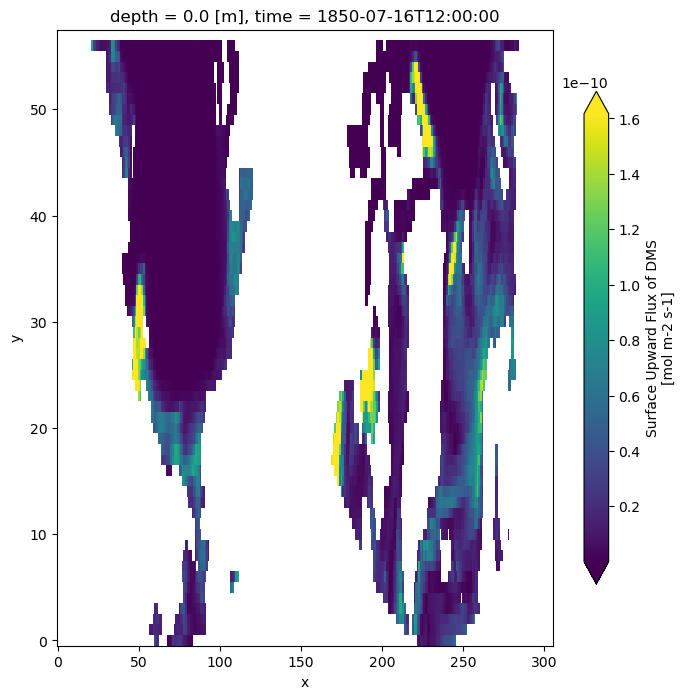

In [10]:
fig, ax = plt.subplots(figsize=(8,8), 
                       # subplot_kw={'projection':ccrs.NorthPolarStereo()}
                      )
ds.fgdms.isel(time=6).plot.pcolormesh( 
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    robust=True
)
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()